# Task 1

##### 1.  Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.
The Aesthetics are income on the x-axis, Life expectancy on the y-axis, and colored by the 4 region, size is the population.

##### 2. Import the q1data.csv dataset.

In [40]:
import pandas as pd
gapminder = pd.read_csv('/Users/shreyachidambaram/Desktop/ML/Machine_Learning_Repository/Lab_1/Data/q1data.csv')
# This is the data I used the first part of the grammer of graphics
gapminder.head()

,income,life_exp,population,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,1910.0,61.0,29200000.0,2010,Afghanistan,asia,south_asia,asia_west,South Asia
1,11100.0,78.1,2950000.0,2010,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,11100.0,74.7,36000000.0,2010,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,46900.0,81.9,84500.0,2010,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
4,7680.0,60.8,23400000.0,2010,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


##### 3.Recreate the plot as best you can using plotnine.

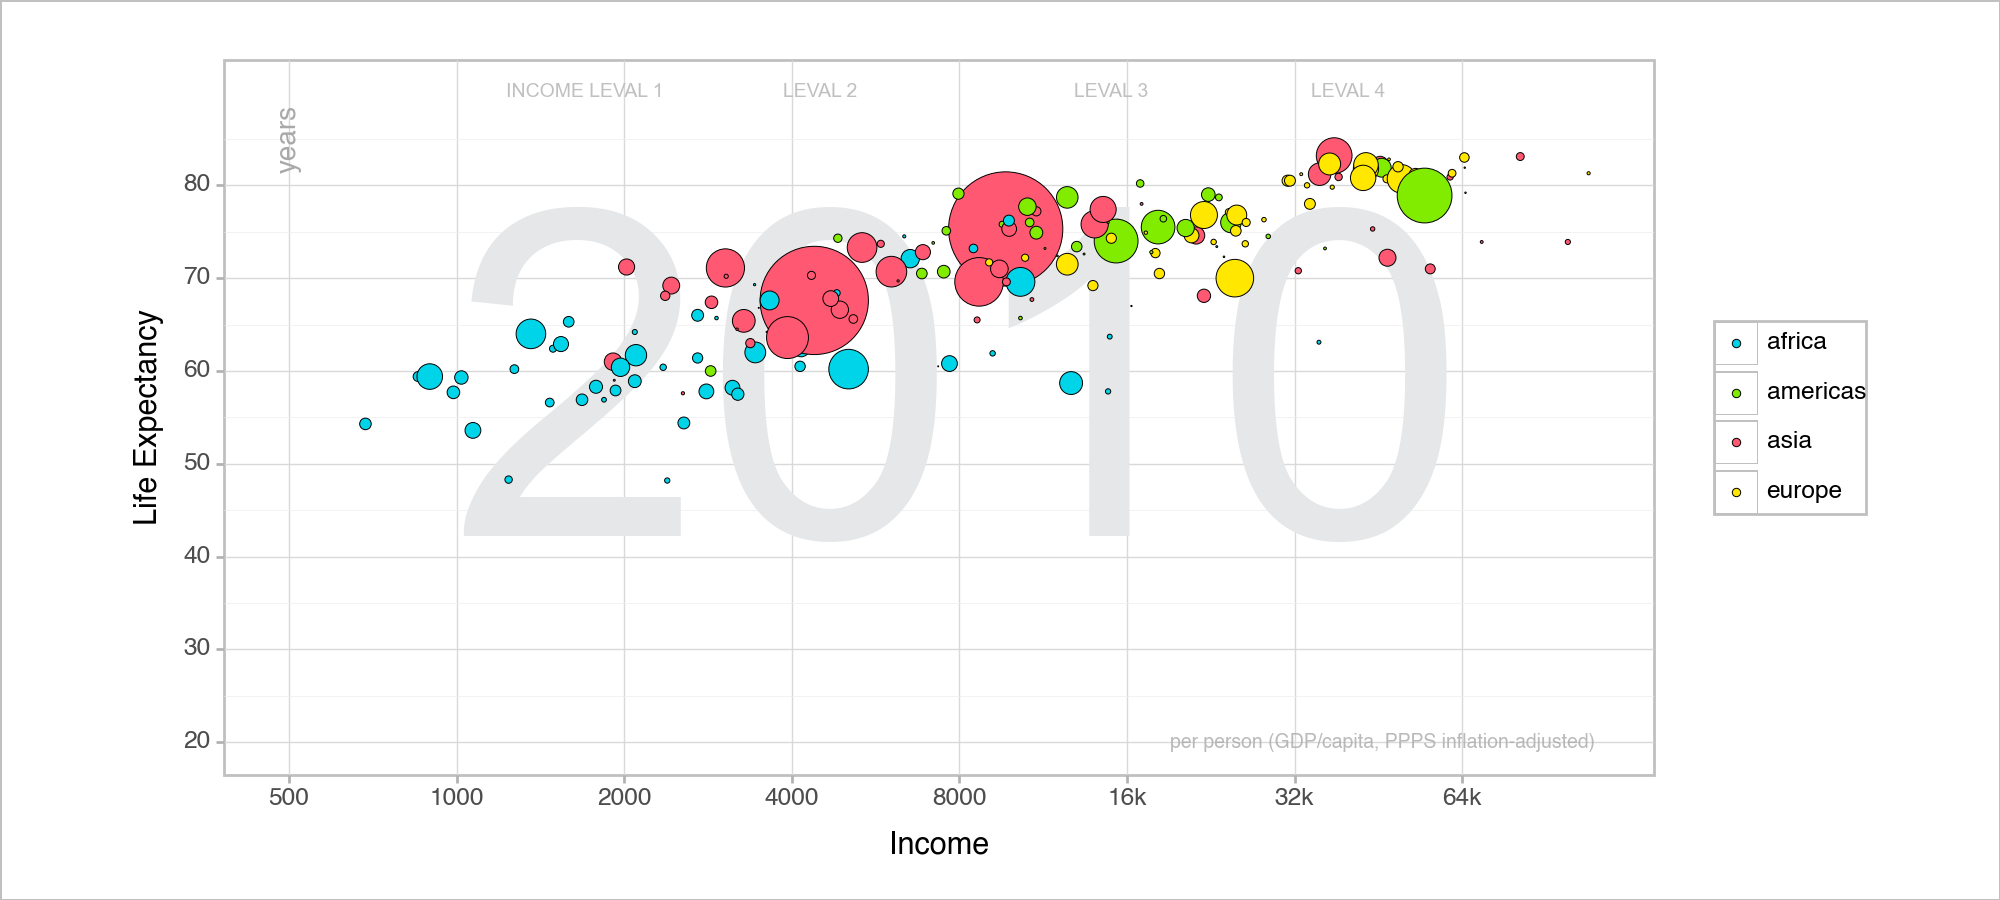

<Figure Size: (1000 x 450)>

In [9]:
from plotnine import ggplot,element_rect, geom_point, aes, scale_x_log10, ylab, xlab,theme_bw,theme_light,scale_y_continuous,scale_x_continuous, scale_fill_manual,guides,element_blank,scale_size
from plotnine import *
filtered_data = gapminder.dropna(subset=["income", "life_exp", "population", "four_regions"]) # Resource: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

p1=(ggplot(filtered_data, aes(x="income", y= "life_exp", fill="factor(four_regions)", size="population")) 
 + annotate('text', x=8000, y=55, label='2010', color='#E5E7E8', size=165, family="Arial") # Resource for font: Chat-GPT 
 + annotate('text', x=1700, y=90, label='INCOME LEVAL 1', color='silver', size=7, family="Arial") # Resource for annontate https://stackoverflow.com/questions/59024019/add-text-to-figure-using-pythons-plotnine
 + annotate('text', x=4500, y=90, label='LEVAL 2', color='silver', size=7, family="Arial")
 + annotate('text', x=15000, y=90, label='LEVAL 3', color='silver', size=7, family="Arial")
 + annotate('text', x=40000, y=90, label='LEVAL 4', color='silver', size=7, family="Arial")
 + annotate("text", x = 46000, y= 20, label = 'per person (GDP/capita, PPPS inflation-adjusted)', size = 7, alpha = 0.8, color = "darkgrey")
 + annotate ("text",label= 'years', x=500, y=85, size = 10, color = "darkgrey", angle = "vertical")
 + geom_point(alpha=1,stroke=0.2) # we are adding a border and some transparency
 + xlab("Income")
 + ylab("Life Expectancy")
 + scale_size(range=(0, 23))# this is the scale for the bubble size
 + scale_y_continuous(limits=(20,90), breaks= range(20,90,10))# Resource for scale: https://pwwang.github.io/plotnine-prism/raw/axes/
 + scale_x_continuous(
        trans='log2',
        breaks=[500, 1000, 2000, 4000, 8000, 16000, 32000, 64000],
        labels = ["500","1000","2000","4000","8000","16k","32k","64k"]) # this is transforming our data and incramenting it
 + theme_light()
 + theme(figure_size=(10,4.5), aspect_ratio=0.5) # Resource for size: https://stackoverflow.com/questions/46046908/ggplot-in-python-plot-size-and-color
 + theme(rect = element_rect(fill = "white", color = "silver", size = 1))
 + scale_fill_manual(values={'europe':'#FFE700','asia':'#FF5872','americas':'#81EB00','africa':'#00D4E8' }) #Resource for manual colors function: Chat-GPT and I got the colors from canva
 + theme(legend_title=element_blank()) 
 + guides(size=False) # Resource for getting rid of element in key: https://github.com/has2k1/plotnine/issues/119
   )

p1


##### 4.What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.

The histogram, unlike the scatter plot, bins life expectancy into intervals and uses bars to show how many countries fall within each range, further broken down by region. At a glance, this visualization offers a clear picture of the distribution of life expectancy across regions. Notably, it highlights that Africa has the highest number of countries with a life expectancy around 75. While the histogram efficiently aggregates data and provides a macroscopic view, it does have limitations. One significant drawback is its lack of granularity; individual countries within each region are not discernible. This contrasts with the bubble plot, which, while possibly more cluttered, gives a detailed view of each country's data point. 

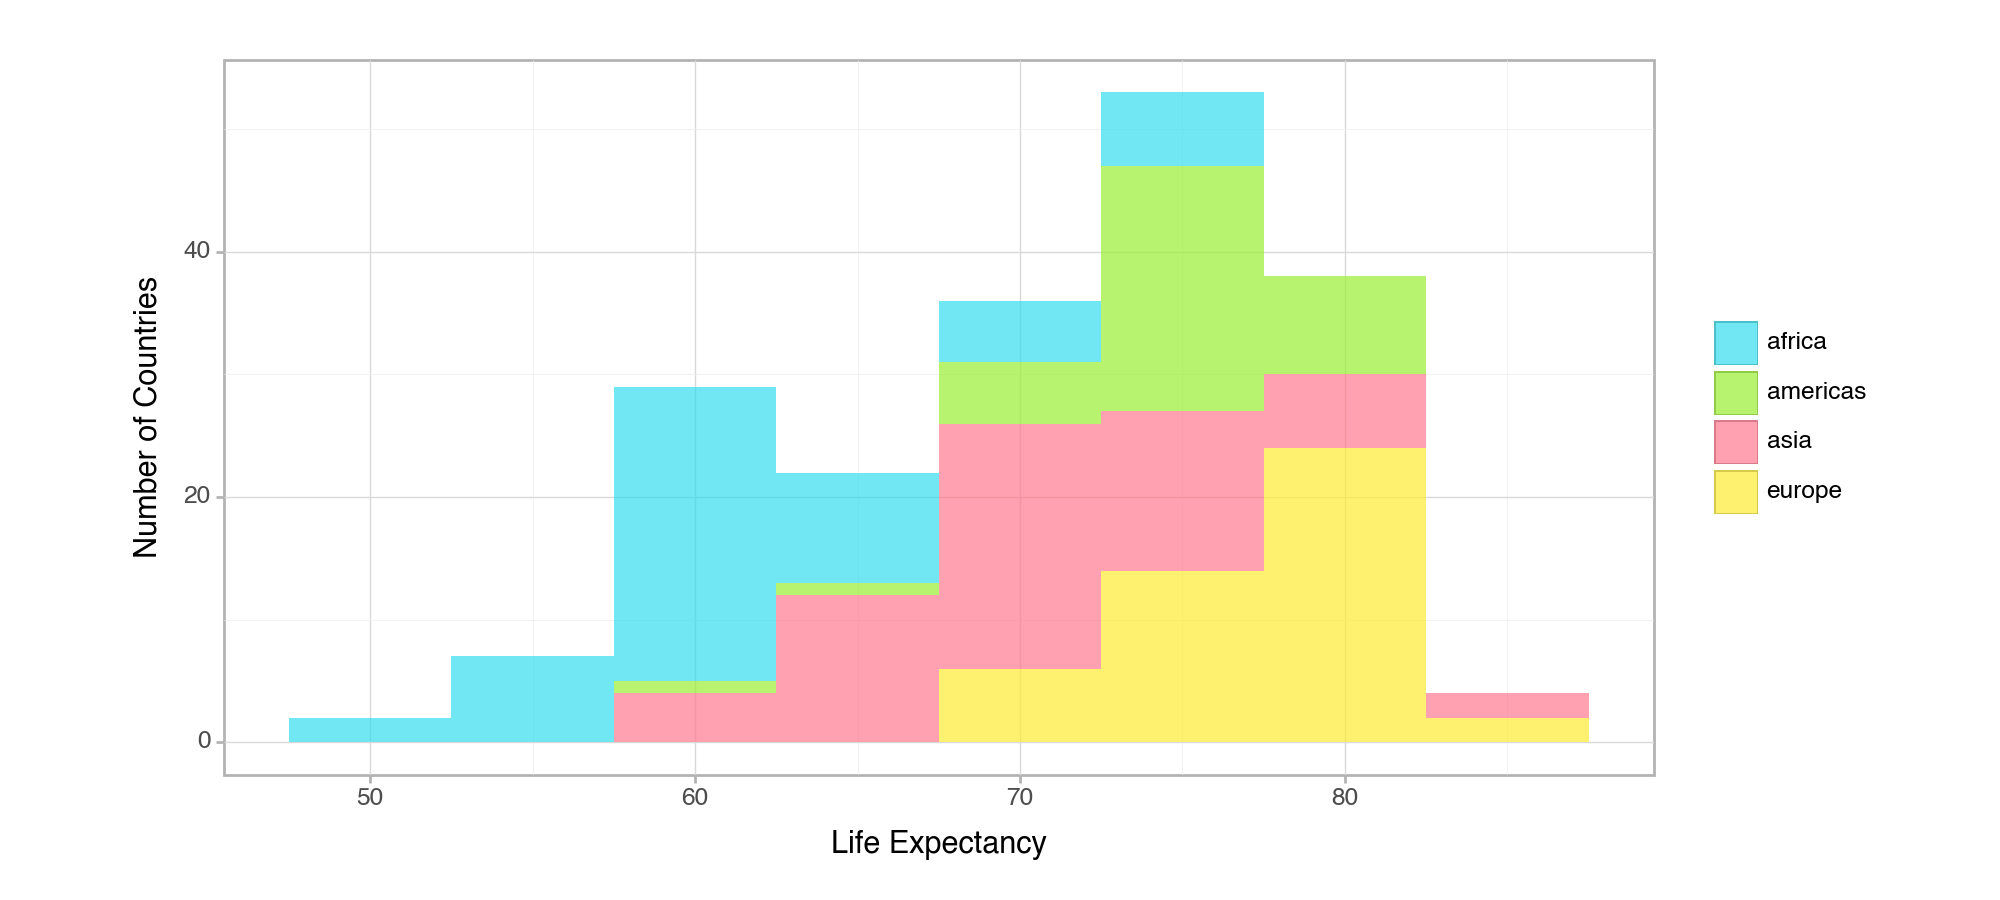

<Figure Size: (1000 x 450)>

In [329]:
# we also create a stacked histogram to see the distribution of counties in the 4 regions's life expectancy
# Resource: https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_histogram.html
p2 = (
    ggplot(filtered_data, aes(x="life_exp", fill="factor(four_regions)"))
    + geom_histogram(binwidth=5, alpha=0.7, position="stack")
    + xlab("Life Expectancy")
    + ylab("Number of Countries")
    + theme_light()
    + theme(figure_size=(10,4.5), aspect_ratio=0.5)
    + scale_fill_manual(values={'europe':'#FFEC32','asia':'#FF798E','americas':'#9AEF32','africa':'#33DDED'})
    + theme(legend_title=element_blank())
)
p2

# Task 2

##### 1.Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.
The Aesthetics are exports on the x-axis, imports on the y-axis, and colored by the 4 regions, size is the energy.

##### 2. Import the q2data.csv dataset.

In [18]:
import pandas as pd
gapminder2 = pd.read_csv('/Users/shreyachidambaram/Desktop/ML/Machine_Learning_Repository/Lab_1/Data/q2data.csv')
# This is the data I used the first part of the grammer of graphics
#gapminder2['energy'] = pd.to_numeric(gapminder2['energy'], errors='coerce')
filtered_data = gapminder2.dropna()
filtered_data.head()



,imports,exports,energy,year,country,four_regions,six_regions,eight_regions,world_bank_region
1,36.7,11.5,427,1997,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,22.5,22.6,825,1997,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
6,12.9,10.4,1660,1997,Argentina,americas,america,america_south,Latin America & Caribbean
7,52.8,19.0,610,1997,Armenia,europe,europe_central_asia,europe_east,Europe & Central Asia
9,20.5,19.6,5550,1997,Australia,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific


##### 3. Recreate the plot as best you can using plotnine.

/Users/shreyachidambaram/anaconda3/lib/python3.11/site-packages/plotnine/scales/scale_size.py:49: PlotnineWarning: Using size for a discrete variable is not advised.


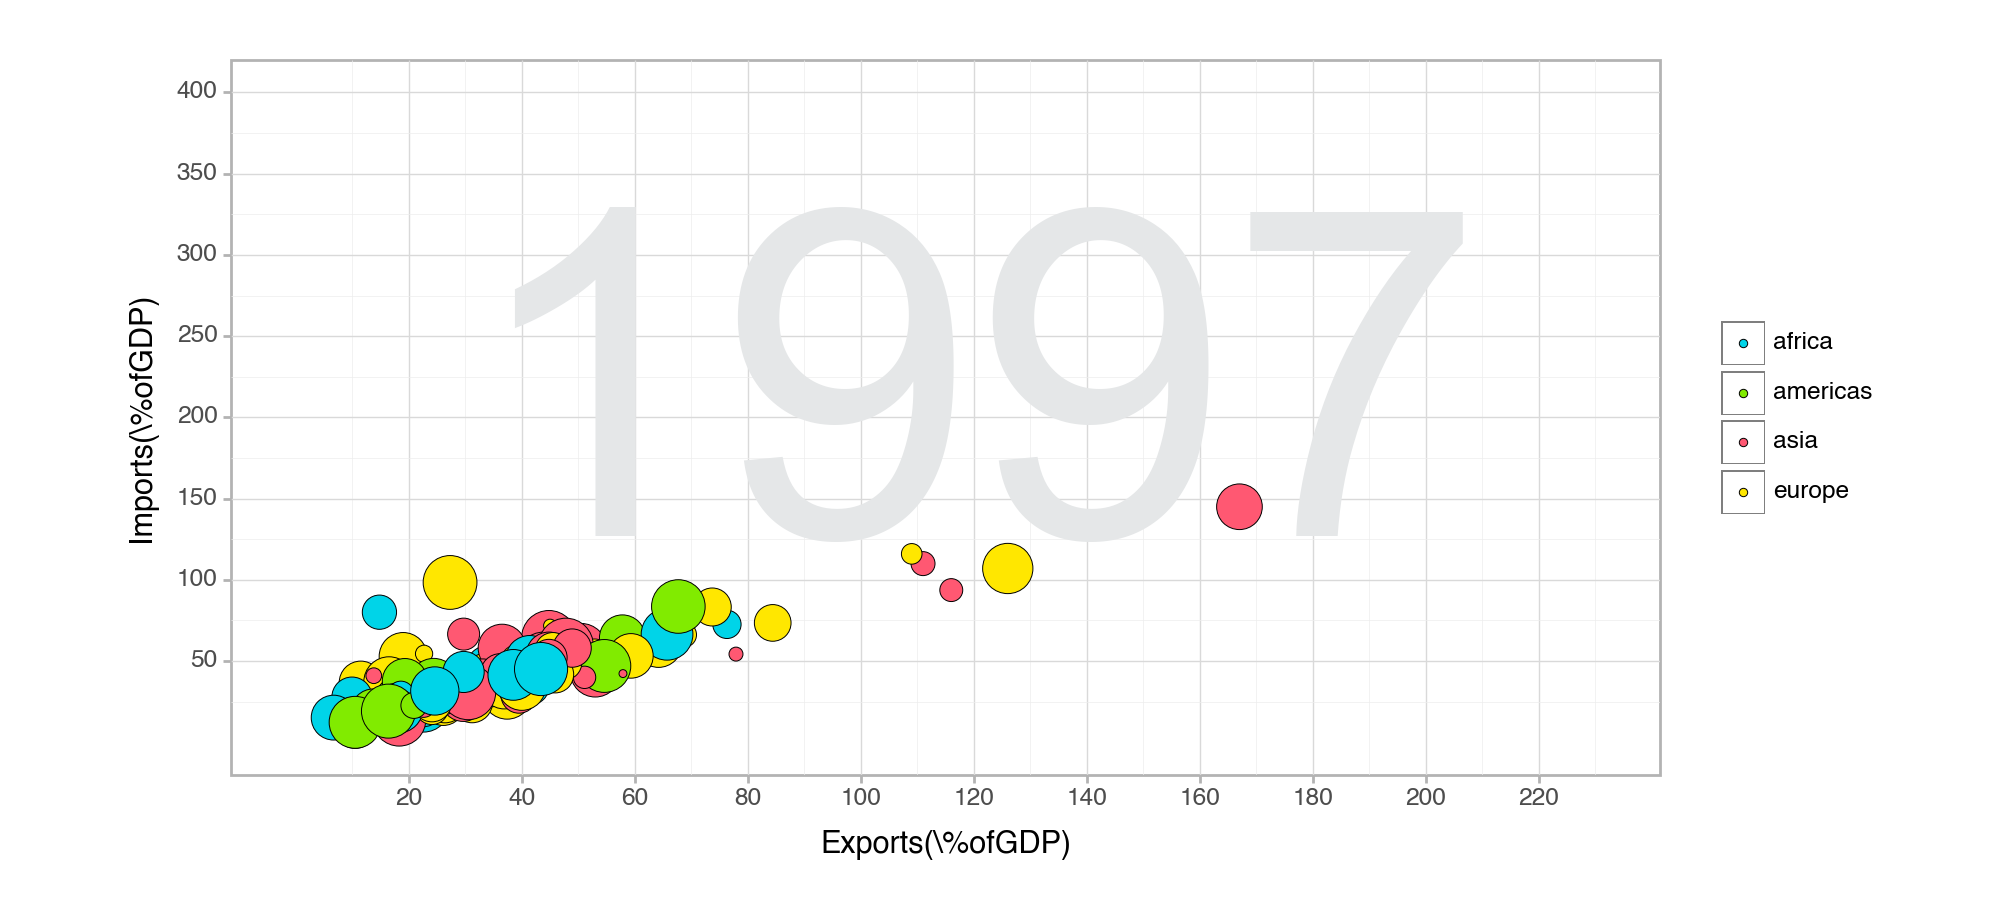

<Figure Size: (1000 x 450)>

In [19]:
from plotnine import ggplot, geom_point, aes, scale_x_log10, ylab, xlab,theme_bw,theme_light,scale_y_continuous,scale_x_continuous, scale_fill_manual,guides,element_blank,scale_size
from plotnine import *
# resource for annontate https://stackoverflow.com/questions/59024019/add-text-to-figure-using-pythons-plotnine


# energy is a string variable and it has to be converted to a float
p3=(ggplot(filtered_data, aes(x="exports", y= "imports", fill="factor(four_regions)", size= "energy"))
 + annotate('text', x=120, y=200, label='1997', color='#E5E7E8', size=165, family="Arial") # Resource: Chat-GPT 
 + geom_point(alpha=1,stroke=0.2)
 + scale_size_discrete(range = (0,11))
 + xlab("Exports(\%ofGDP)")
 + ylab("Imports(\%ofGDP)")
 + scale_y_continuous(limits=(0,400), breaks= range(50,450,50))
 + scale_x_continuous(limits=(0,230), breaks= range(20,230,20))
 + theme_light()
 + theme(figure_size=(10,4.5), aspect_ratio=0.5) # Resource for size: https://stackoverflow.com/questions/46046908/ggplot-in-python-plot-size-and-color
 + scale_fill_manual(values={'europe':'#FFE700','asia':'#FF5872','americas':'#81EB00','africa':'#00D4E8' }) #Resource for manual colors: Chat-GPT 
 + theme(legend_title=element_blank()) 
 + guides(size=False)
   )

p3


##### 4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.

A violin plot can give insights into the density and distribution of internet users for each region. However, compared to a bubble plot, the violin plot does not convey the individuality of each country or the multi-dimensional relationships (like GDP and internet users simultaneously). So while the violin plot gives a summarized view of regional distributions, the bubble plot offers a more detailed perspective, allowing for the identification of specific countries and their unique attributes.And I belive when looking at specifc countries the bubble plot is still the best geometry.

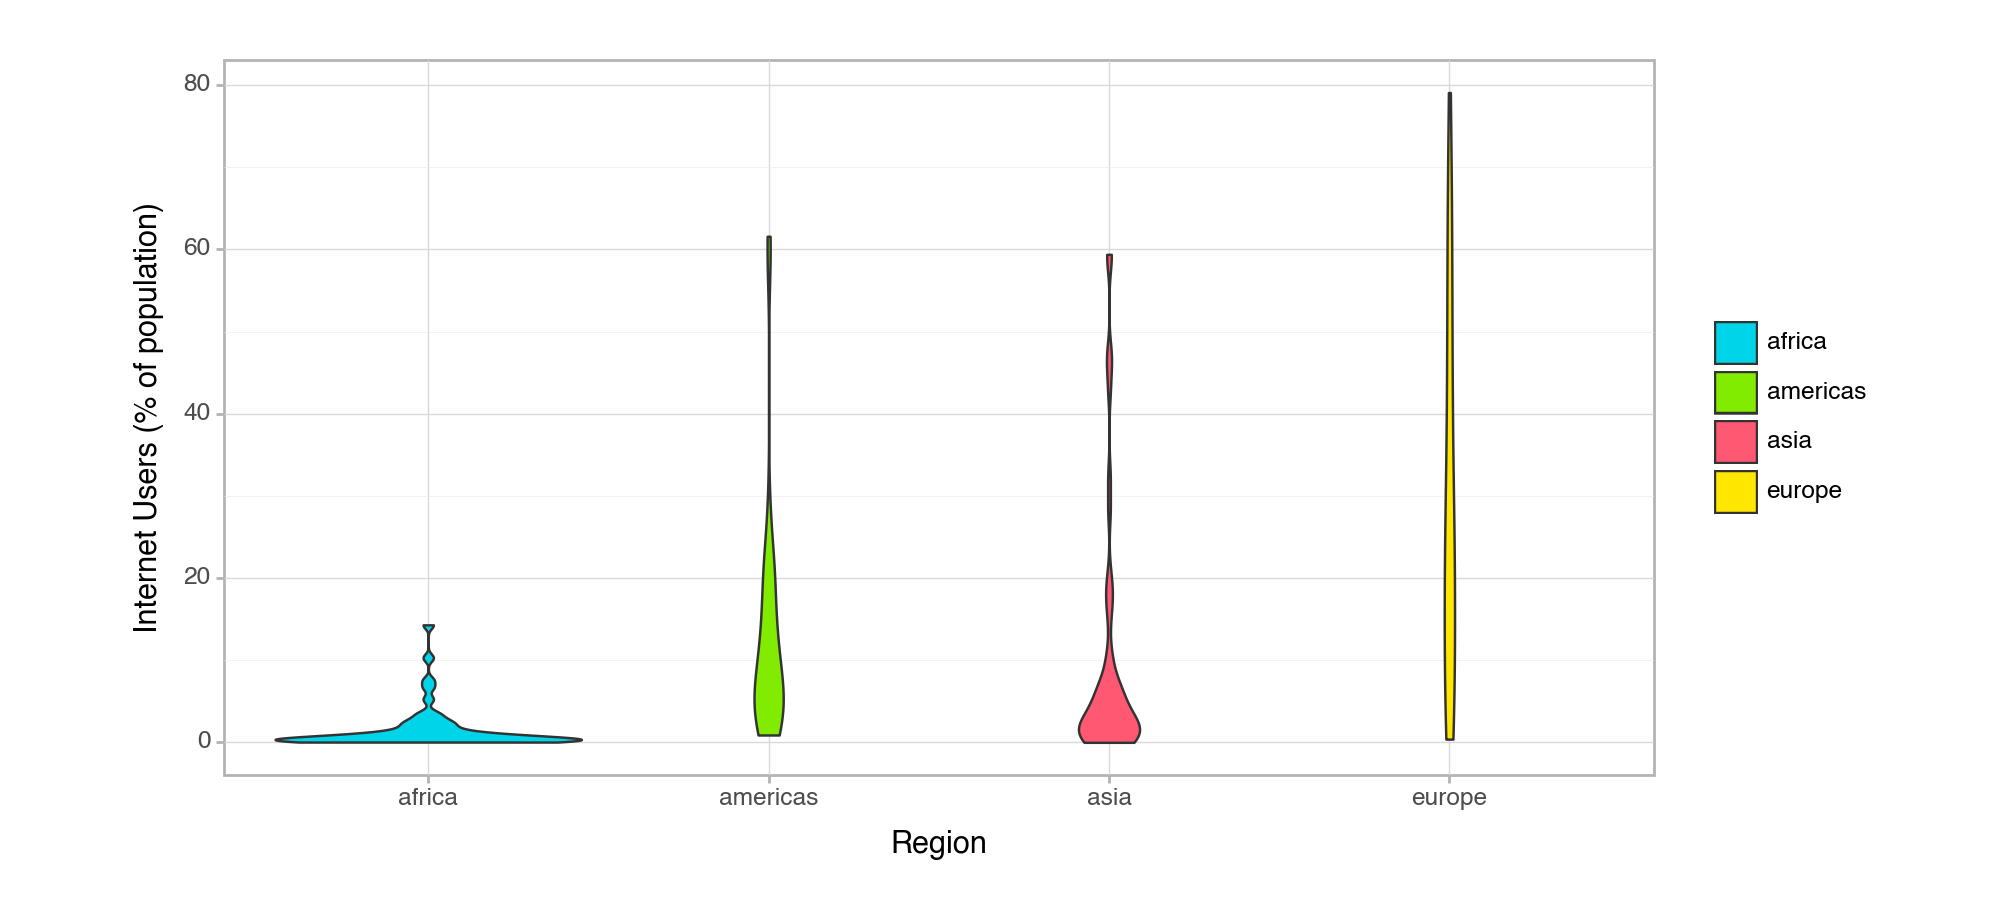

<Figure Size: (1000 x 450)>

In [38]:
# Create a violin plot using plotnine
# Resource: https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_violin.html
p6 = (ggplot(filtered_data, aes(x="four_regions", y="internet_users", fill="four_regions"))
 + geom_violin()
 + xlab("Region")
 + ylab("Internet Users (% of population)")    
 + theme_light()
 + theme(figure_size=(10,4.5), aspect_ratio=0.5) # Resource for size: https://stackoverflow.com/questions/46046908/ggplot-in-python-plot-size-and-color
 + scale_fill_manual(values={'europe':'#FFE700','asia':'#FF5872','americas':'#81EB00','africa':'#00D4E8' }) #Resource for manual colors: Chat-GPT 
 + theme(legend_title=element_blank()) 
 + guides(size=False)
     )

p6


# Task 3

##### 1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.
The Aesthetics are individuals using the internet on the x-axis, GDP/capita on the y-axis, and colored by the 4 region, size is the income.

##### 2.Import the q3data.csv dataset.

In [34]:
import pandas as pd
import numpy as np
gapminder3 = pd.read_csv('/Users/shreyachidambaram/Desktop/ML/Machine_Learning_Repository/Lab_1/Data/q3data.csv')
# This is the data I used the first part of the grammer of graphics
# gapminder3['gdp']=np.log10(gapminder3['gdp'])
gapminder3.head()

,internet_users,gdp,income,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,0.00456,330.0,1190.0,2001,Afghanistan,asia,south_asia,asia_west,South Asia
1,0.39000,2570.0,6780.0,2001,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,1.59000,3770.0,9230.0,2001,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,10500.0,NaN,2001,American Samoa,NaN,NaN,NaN,NaN
4,11.30000,42600.0,35600.0,2001,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia


##### 3.Recreate the plot as best you can using plotnine.

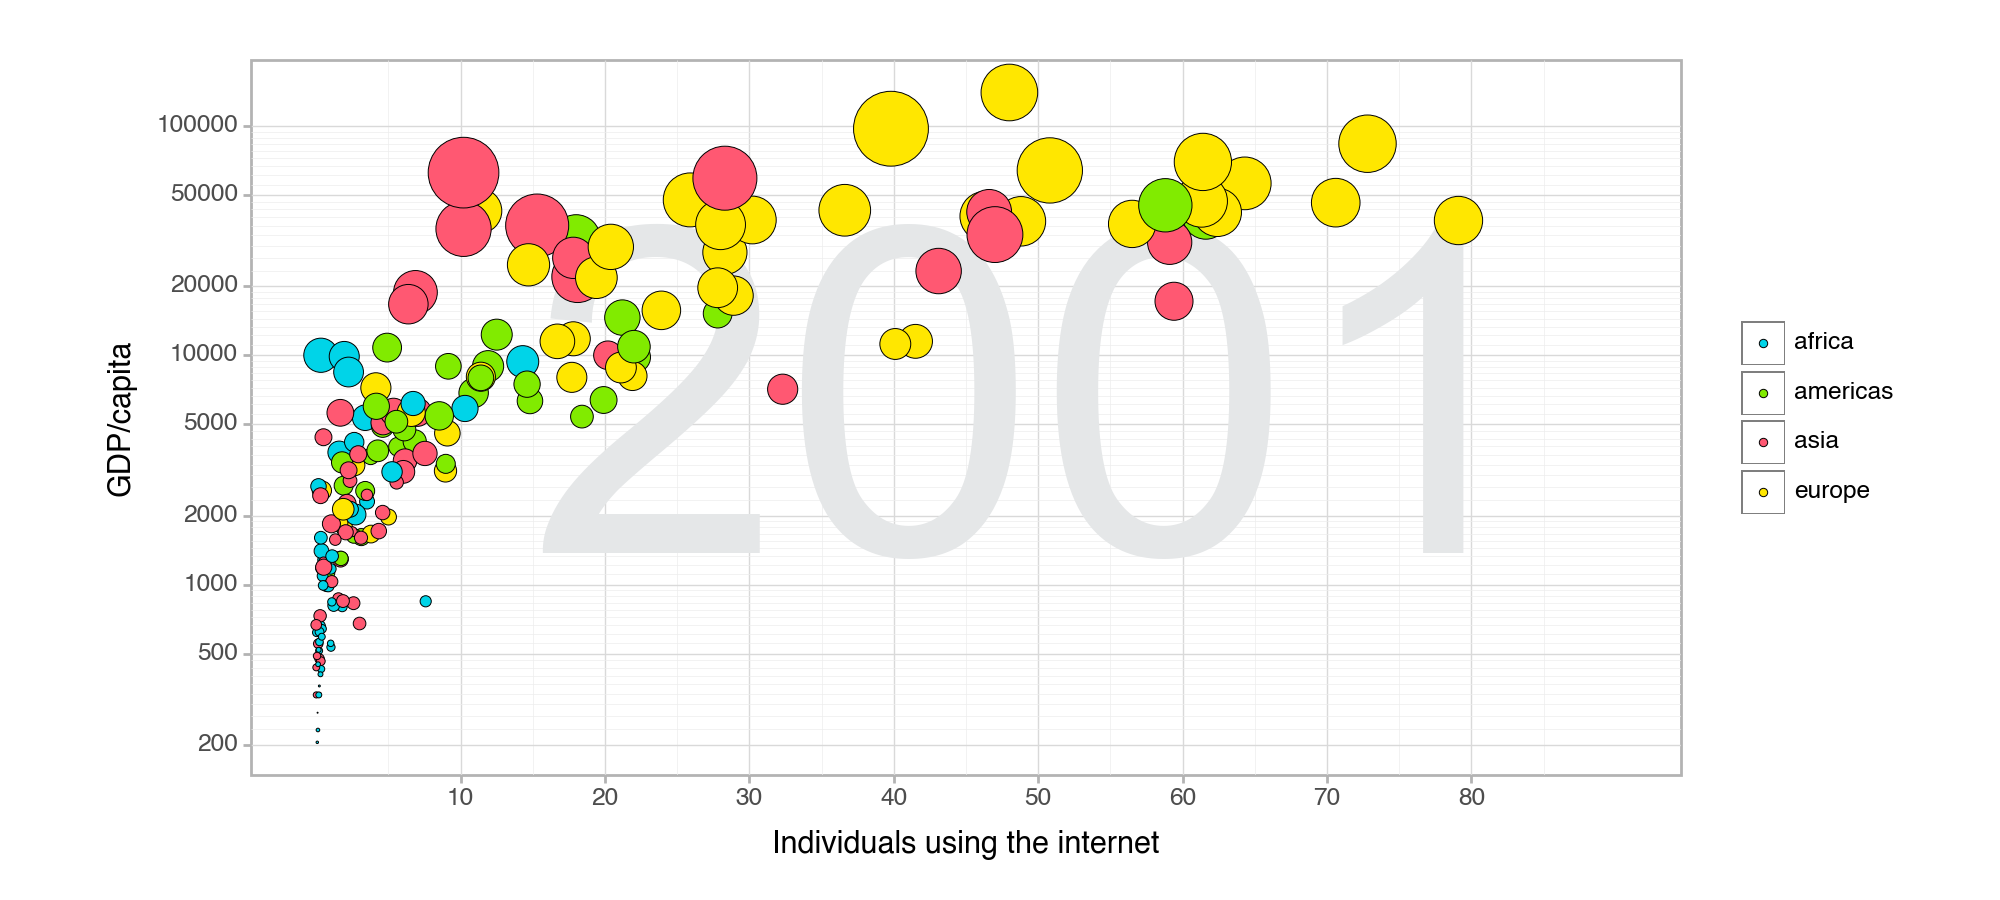

<Figure Size: (1000 x 450)>

In [35]:
from plotnine import ggplot,scale_y_log10, geom_point, aes, scale_x_log10, ylab, xlab,theme_bw,theme_light,scale_y_continuous,scale_x_continuous, scale_fill_manual,guides,element_blank,scale_size
# resource for annontate https://stackoverflow.com/questions/59024019/add-text-to-figure-using-pythons-plotnine

filtered_data = gapminder3.dropna(subset=["internet_users", "income", "gdp", "four_regions"])
filtered_data.head()

p1=(ggplot(filtered_data , aes(x="internet_users", y= "gdp", fill="factor(four_regions)", size="income")) 
 + annotate('text', x=50, y=4500, label='2001', color='#E5E7E8', size=165, family="Arial") # Resource: Chat-GPT 
 + geom_point(alpha=1,stroke=0.2)
 + xlab("Individuals using the internet")
 + ylab("GDP/capita")
 + scale_size(range=(0, 15))
 + scale_x_continuous(limits=(0,90), breaks= range(10,90,10))# Resource for scale: https://pwwang.github.io/plotnine-prism/raw/axes/
 + scale_y_log10(breaks=(200, 500, 1000, 2000, 5000, 10000, 20000, 50000,100000)) 
 + theme_light()
 + theme(figure_size=(10,4.5), aspect_ratio=0.5) # Resource for size: https://stackoverflow.com/questions/46046908/ggplot-in-python-plot-size-and-color
 + scale_fill_manual(values={'europe':'#FFE700','asia':'#FF5872','americas':'#81EB00','africa':'#00D4E8' }) #Resource for manual colors: Chat-GPT 
 + theme(legend_title=element_blank()) 
 + guides(size=False)

   )

p1




##### 4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.

By overlaying a histogram with density lines, we obtain a holistic view ideal for analysis. This approach showcases the distribution of internet_users relative to gdp, segmented by four_regions and sized by income. It effectively conveys regional internet usage patterns and densities. However, I still lean towards the bubble plot as it distinctly represents each country, offering clearer individual insights which I think is more usefull. 

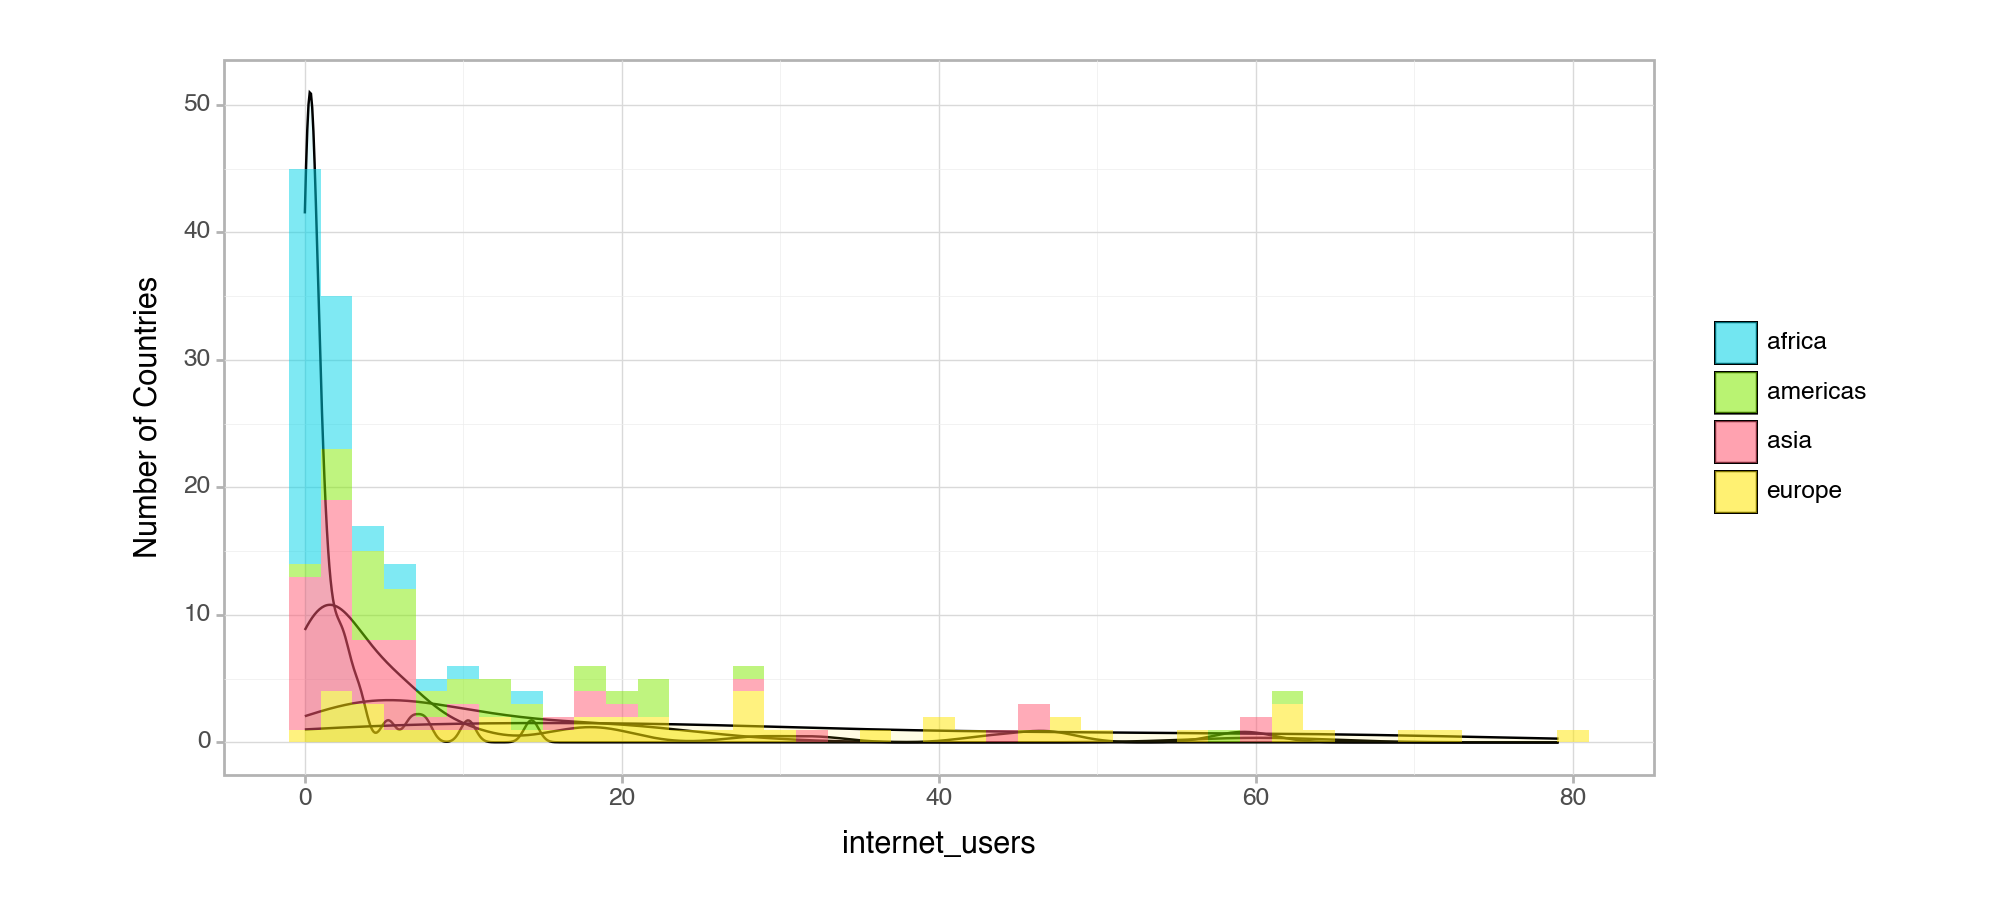

<Figure Size: (1000 x 450)>

In [36]:
from plotnine import *
# Resource: https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_density.html
p1=(ggplot(filtered_data , aes(x="internet_users", y= "gdp", fill="factor(four_regions)", size="income")) 
 + geom_density(aes(y=after_stat('count*2')), alpha=0.1)
 + geom_histogram(aes(fill='factor(four_regions)', y=after_stat('count')), binwidth=2, color='none', alpha=0.5)
 + labs(y='Number of Countries')
 + theme_light()
 + theme(figure_size=(10,4.5), aspect_ratio=0.5) # Resource for size: https://stackoverflow.com/questions/46046908/ggplot-in-python-plot-size-and-color
 + scale_fill_manual(values={'europe':'#FFE700','asia':'#FF5872','americas':'#81EB00','africa':'#00D4E8' }) #Resource for manual colors: Chat-GPT 
 + theme(legend_title=element_blank()) 
 + guides(size=False)
   )

p1